# NoteBook Proyecto Final

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

Se carga el dataset para su posterior limpieza

In [ ]:
df = pd.read_csv("mxmh_survey_results.csv")

Se imprime el dataset original

In [ ]:
print(df.to_string(index=False))

          Timestamp  Age         Primary streaming service  Hours per day While working Instrumentalist Composer        Fav genre Exploratory Foreign languages         BPM Frequency [Classical] Frequency [Country] Frequency [EDM] Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz] Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal] Frequency [Pop] Frequency [R&B] Frequency [Rap] Frequency [Rock] Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD Music effects   Permissions
 8/27/2022 19:29:02 18.0                           Spotify           3.00           Yes             Yes      Yes            Latin         Yes               Yes       156.0                Rarely               Never          Rarely            Never              Never           Sometimes            Never   Very frequently   Very frequently           Rarely             Never Very frequently       Sometimes Very frequently            Never                    Sometimes 

Se eliminan columnas que no tienen gran impacto para el desarollo del proyecto

Se eliminaron las siguientes 7 columnas de la tabla debido a que no aportan de ninguna manera en la invstigacion.

In [ ]:
df = df.drop(columns=['Instrumentalist'])
df = df.drop(columns=['Composer'])
df = df.drop(columns=['Exploratory'])
df = df.drop(columns=['BPM'])
df = df.drop(columns=['Timestamp'])
df = df.drop(columns=['Foreign languages'])
df = df.drop(columns=['Permissions'])

Los datos de la tabla que usaremos para la investigacion son los siguientes:
Age: Edad del encuestado
Primary streaming service: Servicio de streaming principal del encuestado
Hours per day: Número de horas que el encuestado escucha música al día
While working: ¿Escucha el encuestado música mientras estudia/trabaja?
Fav genre: Género favorito o principal del encuestado
Frequency [Classical]: Frecuencia con la que el encuestado escucha música clásica
Frequency [Country]: Frecuencia con la que el encuestado escucha música country
Frequency [EDM]: Frecuencia con la que el encuestado escucha música EDM
Frequency [Folk]: Frecuencia con la que el encuestado escucha música folk
Frequency [Gospel]: Frecuencia con la que el encuestado escucha música gospel
Frequency [Hip hop]: Frecuencia con la que el encuestado escucha música hip hop
Frequency [Jazz]: Frecuencia con la que el encuestado escucha música jazz
Frequency [K pop]: Frecuencia con la que el encuestado escucha música K pop
Frequency [Latin]: Frecuencia con la que el encuestado escucha música latina
Frequency [Lofi]: Frecuencia con la que el encuestado escucha música lofi
Frequency [Metal]: Frecuencia con la que el encuestado escucha música metal
Frequency [Pop]: Frecuencia con la que el encuestado escucha música pop
Frequency [R&B]: Frecuencia con la que el encuestado escucha música R&B
Frequency [Rap]: Frecuencia con la que el encuestado escucha música rap
Frequency [Rock]: Frecuencia con la que el encuestado escucha música rock
Frequency [Video game music]: Frecuencia con la que el encuestado escucha música de videojuegos
Anxiety: Ansiedad autoinformada, en una escala del 0 al 10
Depression: Depresión autoinformada, en una escala del 0 al 10
Insomnia: Insomnio autoinformado, en una escala del 0 al 10
OCD: Trastorno obsesivo-compulsivo autoinformado, en una escala del 0 al 10
Music effects: ¿La música mejora/empeora las condiciones de salud mental del encuestado?


Se hace un histograma de la columna "Age", para poder observar la frecuencia en la que aparecen los disitntos valores de la columna.

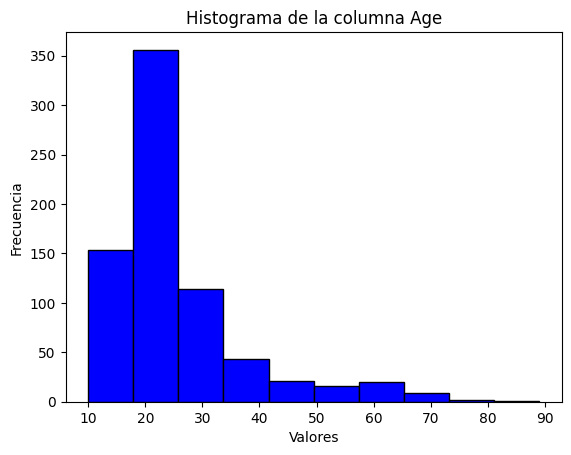

In [ ]:
plt.hist(df['Age'], bins=10, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna Age')

# Mostrar el histograma
plt.show()

Se observo que para los valores mayores a 70 hay muy poca frecuencia comparado con la frecuencia vista en los valores menores a 70.

In [ ]:
resultados = df[df['Age'] > 70]

print(resultados.to_string(index=False))

 Age         Primary streaming service  Hours per day While working Fav genre Frequency [Classical] Frequency [Country] Frequency [EDM] Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz] Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal] Frequency [Pop] Frequency [R&B] Frequency [Rap] Frequency [Rock] Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD Music effects
72.0                           Spotify           6.00           Yes      Rock                 Never           Sometimes           Never            Never              Never               Never  Very frequently             Never         Sometimes            Never             Never          Rarely Very frequently           Never  Very frequently                        Never      0.0         1.0       0.0  2.0       Improve
73.0                           Pandora           3.00           Yes       R&B             Sometimes     Very frequently          Rarely        Sometimes

Se eliminan los datos donde lo valores de la columna "Age" es mayor a 70

In [ ]:
# Filtrar y eliminar valores mayores a 75 en una columna específica
columna = 'Age'
df = df.loc[df[columna] <= 70]

Se hace un diagrama de pastel de la columna "Primary streaming service", para poder observar de otra manera la distribucion de los valores

Text(0, 0.5, '')

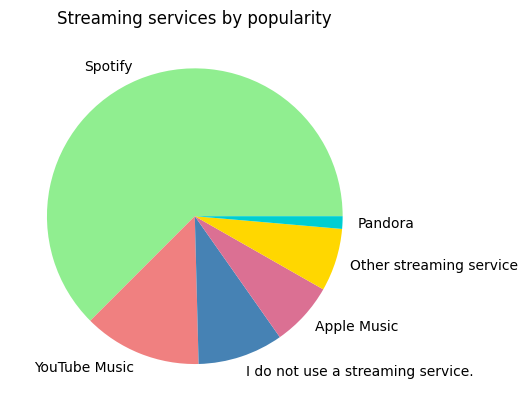

In [ ]:
s_colors = ['lightgreen', 'lightcoral', 'steelblue', 'palevioletred', 'gold', 'darkturquoise']

services = df['Primary streaming service'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Streaming services by popularity')
plt.ylabel("")

Ahora se saca una lista de con los valores de la columna "Primary streaming service"

In [ ]:
streaming_services = df['Primary streaming service'].unique()

# Mostrar los vlores
print(streaming_services)

['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' nan]


In [ ]:
resultados = df[(df['Primary streaming service'] == "Pandora")]

print(resultados.to_string(index=False))

 Age Primary streaming service  Hours per day While working Fav genre Frequency [Classical] Frequency [Country] Frequency [EDM] Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz] Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal] Frequency [Pop] Frequency [R&B] Frequency [Rap] Frequency [Rock] Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD Music effects
63.0                   Pandora            1.5           Yes      Rock             Sometimes               Never           Never           Rarely          Sometimes              Rarely  Very frequently            Rarely         Sometimes           Rarely             Never       Sometimes       Sometimes          Rarely  Very frequently                       Rarely      7.0         2.0       2.0  1.0           NaN
22.0                   Pandora            1.0            No      Rock                Rarely               Never       Sometimes           Rarely              Never     

Debido a que la fecuencia de pandora es tan baja borraremos esta variable.

In [ ]:
columna = 'Primary streaming service'
df = df.loc[df[columna] != "Pandora"]

Se hace un histograma de la columna "Hours per day", para poder observar la frecuencia en la que aparecen los disitntos valores de la columna.

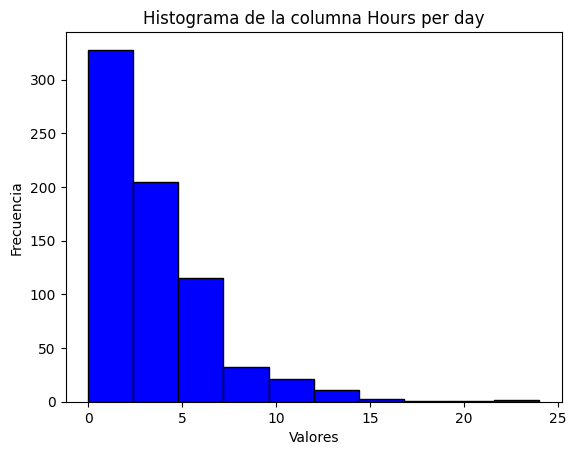

In [ ]:
plt.hist(df['Hours per day'], bins=10, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna Hours per day')

# Mostrar el histograma
plt.show()

Se observa que para los valores mayores a 15 hay muy poca frecuencia comparado con la frecuencia vista en los valores menores a 15.

In [ ]:
resultados = df[df['Hours per day'] > 15]

print(resultados.to_string(index=False))

 Age Primary streaming service  Hours per day While working Fav genre Frequency [Classical] Frequency [Country] Frequency [EDM] Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz] Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal] Frequency [Pop] Frequency [R&B] Frequency [Rap] Frequency [Rock] Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD Music effects
17.0                   Spotify           24.0           Yes       Rap                Rarely               Never           Never            Never              Never           Sometimes        Sometimes         Sometimes            Rarely            Never         Sometimes          Rarely       Sometimes Very frequently  Very frequently                        Never      7.0         5.0       0.0  3.0       Improve
27.0                   Spotify           20.0           Yes      Rock             Sometimes              Rarely       Sometimes           Rarely              Never     

Se eliminan los datos donde lo valores de la columna "Hours per day" es mayor a 15

In [ ]:
# Filtrar y eliminar valores mayores a 75 en una columna específica
columna = 'Hours per day'
df = df.loc[df[columna] < 15]

Se hace un diagrama de pastel de la columna "While working", para poder observar de otra manera la distribucion de los valores

Text(0, 0.5, '')

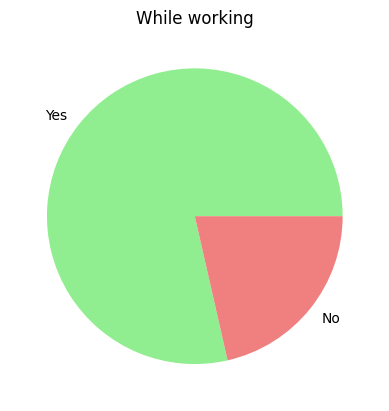

In [ ]:
s_colors = ['lightgreen', 'lightcoral']

services = df['While working'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('While working')
plt.ylabel("")

Ahora se saca una lista de con los valores de la columna "While working"

In [ ]:
While_working = df['While working'].unique()

# Mostrar los valores
print(While_working)

['Yes' 'No' nan]


Se hace un diagrama de pastel de la columna "Fav genre", para poder observar de otra manera la distribucion de los valores


Text(0, 0.5, '')

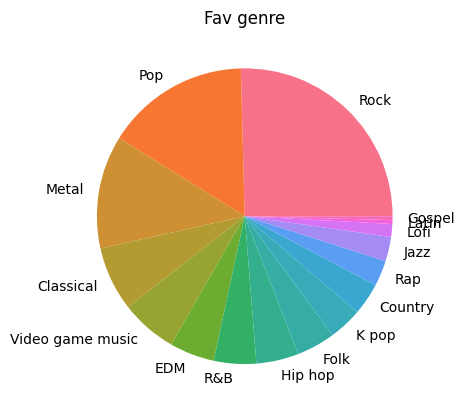

In [ ]:

valores = df['Fav genre'].unique()
# Gestionar los colores con seaborn
paleta_colores = sns.color_palette("husl", len(valores))

# Convertir los colores de la paleta en formato hexadecimal
lista_colores = paleta_colores.as_hex()
services = df['Fav genre'].value_counts()
services.plot(kind='pie', colors = lista_colores)

plt.title('Fav genre')
plt.ylabel("")

Ahora se saca una lista de con los valores de la columna "Fav genre"

In [ ]:


fav = df['Fav genre'].unique()

# Mostrar los vlores
print(fav)


['Latin' 'Video game music' 'Jazz' 'R&B' 'K pop' 'Rock' 'Country' 'EDM'
 'Pop' 'Hip hop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']


Se eliminan los valores de 'Fav genre', que tienen poca frecuencia, junto con sus columnas de refrecuencia respectiva.

In [ ]:
columna = 'Fav genre'
df = df.loc[df[columna] != "Latin"]
df = df.loc[df[columna] != "Rap"]
df = df.loc[df[columna] != "Lofi"]
df = df.loc[df[columna] != "Gospel"]
df = df.loc[df[columna] != "Jazz"]
df = df.loc[df[columna] != "Country"]
df = df.loc[df[columna] != "K pop"]

df = df.drop('Frequency [Latin]', axis=1)
df = df.drop('Frequency [Rap]', axis=1)
df = df.drop('Frequency [Lofi]', axis=1)
df = df.drop('Frequency [Gospel]', axis=1)
df = df.drop('Frequency [Jazz]', axis=1)
df = df.drop('Frequency [Country]', axis=1)
df = df.drop('Frequency [K pop]', axis=1)




Se hace un diagrama de pastel de todas las columnas "Frequency [genero]", para poder observar de otra manera la distribucion de los valores

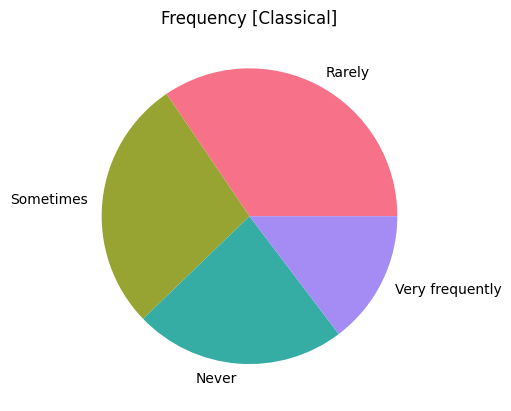

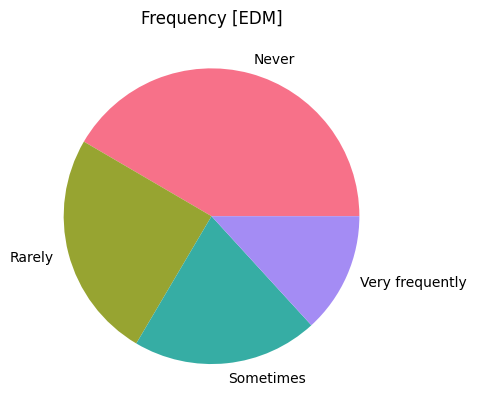

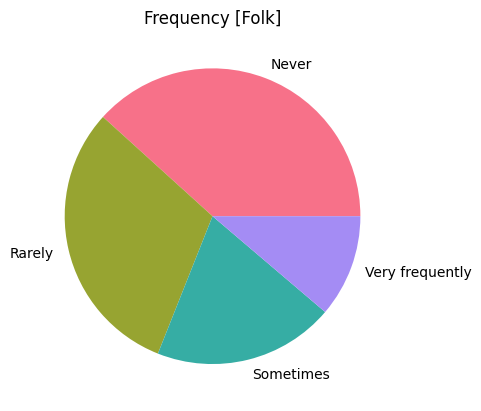

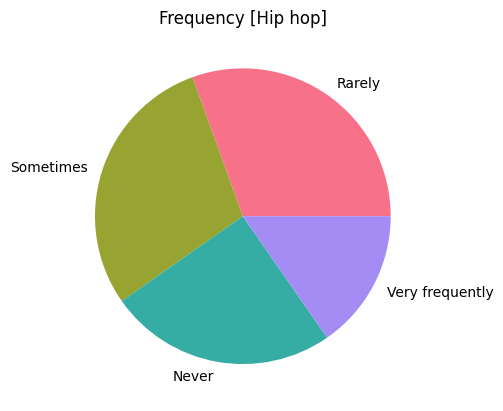

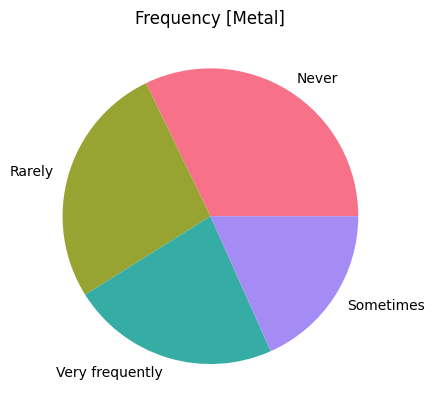

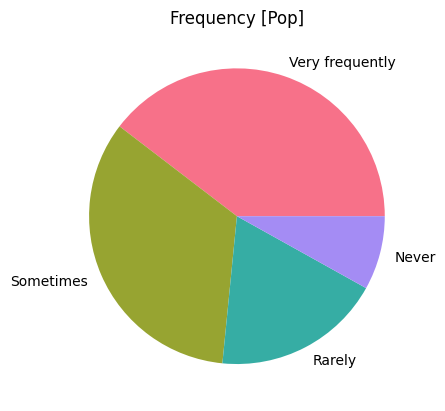

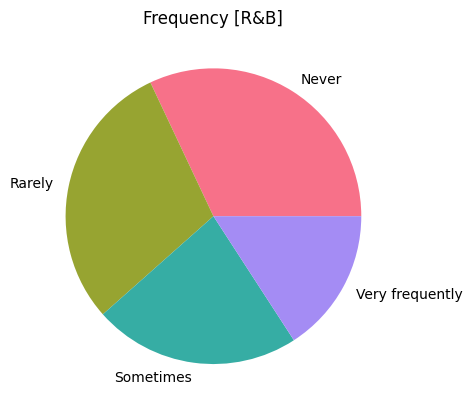

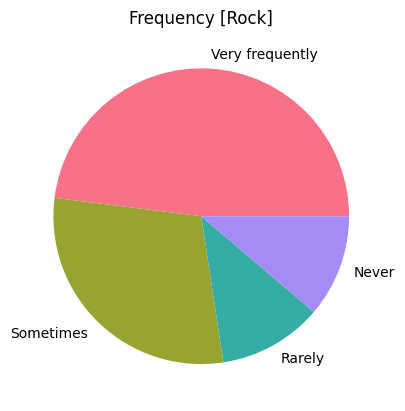

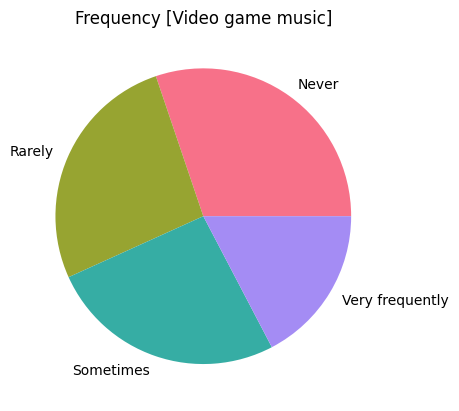

In [ ]:
columnas_frecuencia = [columna for columna in df.columns if columna.startswith('Frequency')]
for columna in columnas_frecuencia:
    valores = df[columna].unique()
    paleta_colores = sns.color_palette("husl", len(valores))
    lista_colores = paleta_colores.as_hex()
    services = df[columna].value_counts()
    services.plot(kind='pie', colors=lista_colores)
    plt.title(columna)
    plt.ylabel("")
    plt.show()

Ahora se saca una lista de con los valores para cada columna "Frequency [genero]"

---



In [ ]:
columnas_frecuencia = [columna for columna in df.columns if columna.startswith('Frequency')]
for columna in columnas_frecuencia:
    valores = df[columna].unique()
    print(f"Valores únicos de {columna}: {valores}")

Valores únicos de Frequency [Classical]: ['Never' 'Sometimes' 'Rarely' 'Very frequently']
Valores únicos de Frequency [EDM]: ['Very frequently' 'Rarely' 'Never' 'Sometimes']
Valores únicos de Frequency [Folk]: ['Never' 'Sometimes' 'Rarely' 'Very frequently']
Valores únicos de Frequency [Hip hop]: ['Rarely' 'Very frequently' 'Never' 'Sometimes']
Valores únicos de Frequency [Metal]: ['Sometimes' 'Never' 'Rarely' 'Very frequently']
Valores únicos de Frequency [Pop]: ['Rarely' 'Sometimes' 'Never' 'Very frequently']
Valores únicos de Frequency [R&B]: ['Never' 'Very frequently' 'Rarely' 'Sometimes']
Valores únicos de Frequency [Rock]: ['Rarely' 'Never' 'Very frequently' 'Sometimes']
Valores únicos de Frequency [Video game music]: ['Very frequently' 'Rarely' 'Sometimes' 'Never']


Se hace un histograma a cada columna "Frequency [genero]", para poder observar la frecuencia en la que aparecen los disitntos valores de la columna.


Se hace un histograma de la columna "Anxiety", para poder observar la frecuencia en la que aparecen los disitntos valores de la columna.

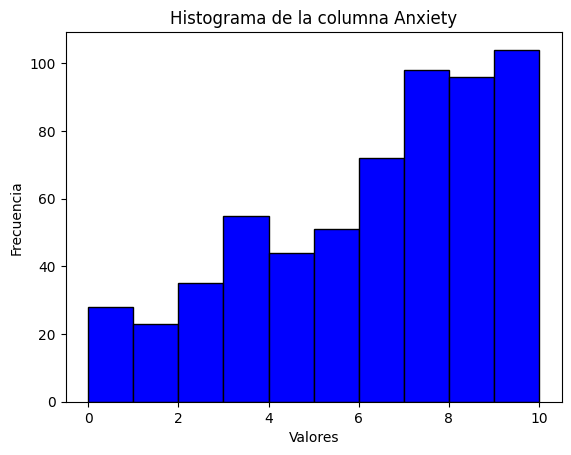

In [ ]:
plt.hist(df['Anxiety'], bins=10, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna Anxiety')

# Mostrar el histograma
plt.show()

Se hace un histograma de la columna "Depression", para poder observar la frecuencia en la que aparecen los disitntos valores de la columna.

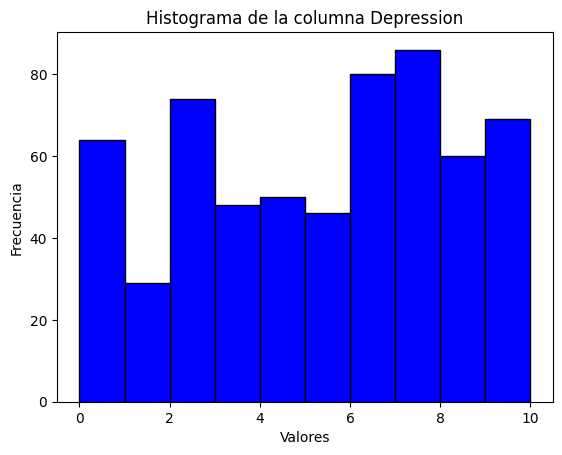

In [ ]:
plt.hist(df['Depression'], bins=10, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna Depression')

# Mostrar el histograma
plt.show()

Se hace un histograma de la columna "Insomnia", para poder observar la frecuencia en la que aparecen los disitntos valores de la columna.

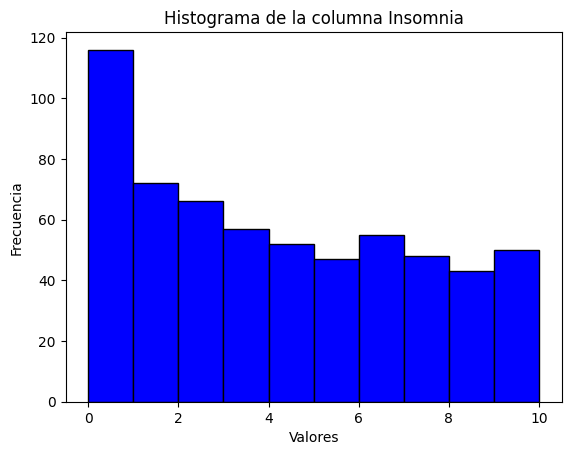

In [ ]:
plt.hist(df['Insomnia'], bins=10, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna Insomnia')

# Mostrar el histograma
plt.show()

Se hace un histograma de la columna "OCD", para poder observar la frecuencia en la que aparecen los disitntos valores de la columna.

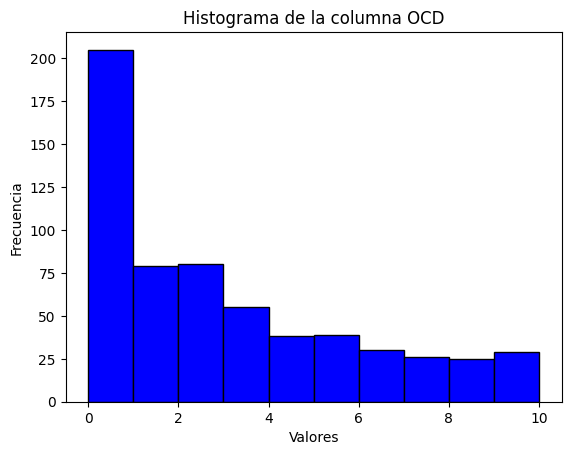

In [ ]:
plt.hist(df['OCD'], bins=10, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna OCD')

# Mostrar el histograma
plt.show()

Se observa que para el valor de worsen (2) hay muy poca frecuencia comparado con la frecuencia vista en los demas valores.

In [ ]:
resultados = df[df['Music effects'] == 2]

print(resultados.to_string(index=False))

Empty DataFrame
Columns: [Age, Primary streaming service, Hours per day, While working, Fav genre, Frequency [Classical], Frequency [EDM], Frequency [Folk], Frequency [Hip hop], Frequency [Metal], Frequency [Pop], Frequency [R&B], Frequency [Rock], Frequency [Video game music], Anxiety, Depression, Insomnia, OCD, Music effects]
Index: []


Como el valor de 'worsen' es muy bajo eliminamos ese dato

In [ ]:
# Filtrar y eliminar valor 2
columna = 'Music effects'
df = df.loc[df[columna] != "worsen"]

Partir el 80% para training y 20% para test

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Divide el conjunto de datos en entrenamiento (80%) y prueba (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.to_csv('train_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

Partir el train en Train 2 80% y Validation 20%

In [ ]:
train2, validation = train_test_split(train_df, test_size=0.2, random_state=42)
train2.to_csv('train2_dataset.csv', index=False)
validation.to_csv('validation_dataset.csv', index=False)